# Cement Sales Forecasting 

Import required libraries

In [61]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
import math

In [62]:
data = pd.read_excel(r"C:\Users\psaik\OneDrive\Desktop\All India_Features.xlsx")

In [63]:
data

Date  GDP_Construction_Rs_Crs  GDP_Realestate_Rs_Crs  \
0  2015-01-31                   214180                 481401   
1  2015-02-28                   214180                 481401   
2  2015-03-31                   214180                 481401   
3  2015-04-30                   218253                 594978   
4  2015-05-31                   218253                 594978   
..        ...                      ...                    ...   
91 2022-08-31                   273487                 816470   
92 2022-09-30                   273487                 816470   
93 2022-10-31                   324378                 843219   
94 2022-11-30                   324378                 843219   
95 2022-12-31                   324378                 843219   

    Oveall_GDP_Growth%  Water_Source  Limestone  Coal_Milliontonne  \
0                  7.5        178.06     169.76             0.0944   
1                  8.0        169.09     238.44             0.0745   
2                  8.5        170.73     176.68             0.0721   
3                  8.6        266.73     234.24             0.0733   
4                  8.5        243.53     220.01             0.0734   
..                 ...           ...        ...                ...   
91                 8.5        121.56     141.74             0.0734   
92                 8.3        247.73     168.44             0.0893   
93                 7.6        262.48     146.56             0.1277   
94                 8.9        150.98     159.77             0.1245   
95                 7.8        151.63     195.44             0.1349   

    Home_Interest_Rate  Trasportation_Cost  Order_Quantity_Milliontonnes  \
0                10.15          322.070000                         4.798   
1                10.00          316.918451                         4.318   
2                 9.10          286.484332                         3.719   
3                10.20          286.292799                         3.583   
4                 9.90          300.299462                         3.581   
..                 ...                 ...                           ...   
91                7.35          494.928740                         6.317   
92                7.35          520.414790                         7.126   
93                7.60          517.847712                         7.223   
94                7.75          581.142216                         8.229   
95                8.00          690.657836                         8.701   

    Sales_Quantity_Milliontonnes  Unit_Price  
0                          4.598      350.23  
1                          4.308      350.31  
2                          3.659      355.89  
3                          3.510      354.63  
4                          3.541      353.36  
..                           ...         ...  
91                         6.245      396.26  
92                         7.015      370.93  
93                         7.152      362.03  
94                         8.124      357.67  
95                         8.954      385.67  

[96 rows x 12 columns]

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          96 non-null     datetime64[ns]
 1   GDP_Construction_Rs_Crs       96 non-null     int64         
 2   GDP_Realestate_Rs_Crs         96 non-null     int64         
 3   Oveall_GDP_Growth%            96 non-null     float64       
 4   Water_Source                  96 non-null     float64       
 5   Limestone                     96 non-null     float64       
 6   Coal_Milliontonne             96 non-null     float64       
 7   Home_Interest_Rate            96 non-null     float64       
 8   Trasportation_Cost            96 non-null     float64       
 9   Order_Quantity_Milliontonnes  96 non-null     float64       
 10  Sales_Quantity_Milliontonnes  96 non-null     float64       
 11  Unit_Price                    96 n

In [65]:
data.describe()

GDP_Construction_Rs_Crs  GDP_Realestate_Rs_Crs  Oveall_GDP_Growth%  \
count                96.000000               96.00000           96.000000   
mean             240150.187500           699625.31250            5.460417   
std               54762.487549           119928.39492            6.850685   
min               24071.000000           481401.00000          -28.300000   
25%              224883.500000           611022.00000            5.200000   
50%              240005.500000           701130.50000            6.800000   
75%              261470.500000           799100.00000            8.100000   
max              338283.000000           924137.00000           24.500000   

       Water_Source   Limestone  Coal_Milliontonne  Home_Interest_Rate  \
count     96.000000   96.000000          96.000000           96.000000   
mean     202.713229  168.941667           0.089729            7.966146   
std       52.629867   39.720864           0.023971            1.139910   
min      103.250000  100.430000           0.059800            6.650000   
25%      164.052500  139.740000           0.073000            6.925000   
50%      199.145000  168.765000           0.082200            7.850000   
75%      243.707500  202.352500           0.098425            8.337500   
max      298.670000  247.280000           0.150100           10.750000   

       Trasportation_Cost  Order_Quantity_Milliontonnes  \
count           96.000000                     96.000000   
mean           436.675698                      5.621927   
std            116.204055                      1.674881   
min            248.878362                      3.039000   
25%            335.536787                      4.122000   
50%            433.109541                      5.670500   
75%            519.000843                      6.914250   
max            715.424600                      9.047000   

       Sales_Quantity_Milliontonnes  Unit_Price  
count                     96.000000   96.000000  
mean                       5.568677  376.462917  
std                        1.643412   15.064145  
min                        3.021000  350.150000  
25%                        4.103500  363.760000  
50%                        5.646500  377.300000  
75%                        6.897000  389.380000  
max                        8.954000  399.830000

In [66]:
data.isna().sum()

Date                            0
GDP_Construction_Rs_Crs         0
GDP_Realestate_Rs_Crs           0
Oveall_GDP_Growth%              0
Water_Source                    0
Limestone                       0
Coal_Milliontonne               0
Home_Interest_Rate              0
Trasportation_Cost              0
Order_Quantity_Milliontonnes    0
Sales_Quantity_Milliontonnes    0
Unit_Price                      0
dtype: int64

In [67]:
data.duplicated().sum()

0

In [68]:
data[['GDP_Realestate_Rs_Crs', 'GDP_Construction_Rs_Crs']] = data[['GDP_Realestate_Rs_Crs', 'GDP_Construction_Rs_Crs']].astype(float)

In [69]:
data['Date'] =  pd.to_datetime(data['Date'])

Text(0.5, 1.0, 'Sales_Quantitu_Milliontonnes')

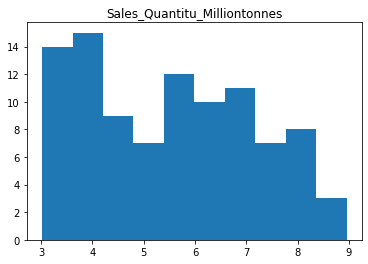

In [70]:
plt.hist(data['Sales_Quantity_Milliontonnes'])
plt.title("Sales_Quantitu_Milliontonnes")

C:\Users\psaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='GDP_Construction_Rs_Crs'>

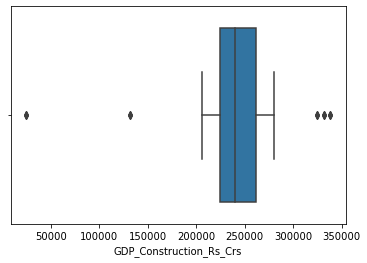

In [71]:
sns.boxplot(data['GDP_Construction_Rs_Crs'])

C:\Users\psaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Oveall_GDP_Growth%'>

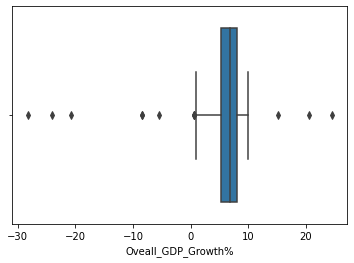

In [72]:
sns.boxplot(data['Oveall_GDP_Growth%'])

C:\Users\psaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Coal_Milliontonne'>

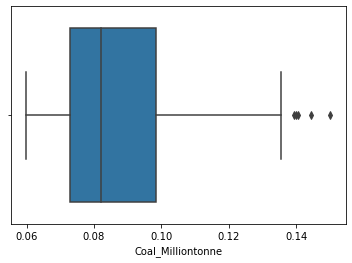

In [73]:
sns.boxplot(data['Coal_Milliontonne'])

C:\Users\psaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Home_Interest_Rate'>

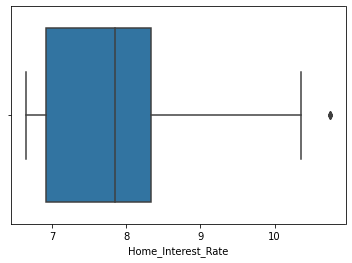

In [74]:
sns.boxplot(data['Home_Interest_Rate'])

Winsorization to remove outliers

In [75]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['GDP_Construction_Rs_Crs', 'Oveall_GDP_Growth%',
                    'Coal_Milliontonne', 'Home_Interest_Rate'])

data[['GDP_Construction_Rs_Crs', 'Oveall_GDP_Growth%', 'Coal_Milliontonne', 'Home_Interest_Rate']] = winsor.fit_transform(data[['GDP_Construction_Rs_Crs',
                                                                          'Oveall_GDP_Growth%', 'Coal_Milliontonne', 'Home_Interest_Rate']])
data

Date  GDP_Construction_Rs_Crs  GDP_Realestate_Rs_Crs  \
0  2015-01-31                 214180.0               481401.0   
1  2015-02-28                 214180.0               481401.0   
2  2015-03-31                 214180.0               481401.0   
3  2015-04-30                 218253.0               594978.0   
4  2015-05-31                 218253.0               594978.0   
..        ...                      ...                    ...   
91 2022-08-31                 273487.0               816470.0   
92 2022-09-30                 273487.0               816470.0   
93 2022-10-31                 316351.0               843219.0   
94 2022-11-30                 316351.0               843219.0   
95 2022-12-31                 316351.0               843219.0   

    Oveall_GDP_Growth%  Water_Source  Limestone  Coal_Milliontonne  \
0                  7.5        178.06     169.76             0.0944   
1                  8.0        169.09     238.44             0.0745   
2                  8.5        170.73     176.68             0.0721   
3                  8.6        266.73     234.24             0.0733   
4                  8.5        243.53     220.01             0.0734   
..                 ...           ...        ...                ...   
91                 8.5        121.56     141.74             0.0734   
92                 8.3        247.73     168.44             0.0893   
93                 7.6        262.48     146.56             0.1277   
94                 8.9        150.98     159.77             0.1245   
95                 7.8        151.63     195.44             0.1349   

    Home_Interest_Rate  Trasportation_Cost  Order_Quantity_Milliontonnes  \
0                10.15          322.070000                         4.798   
1                10.00          316.918451                         4.318   
2                 9.10          286.484332                         3.719   
3                10.20          286.292799                         3.583   
4                 9.90          300.299462                         3.581   
..                 ...                 ...                           ...   
91                7.35          494.928740                         6.317   
92                7.35          520.414790                         7.126   
93                7.60          517.847712                         7.223   
94                7.75          581.142216                         8.229   
95                8.00          690.657836                         8.701   

    Sales_Quantity_Milliontonnes  Unit_Price  
0                          4.598      350.23  
1                          4.308      350.31  
2                          3.659      355.89  
3                          3.510      354.63  
4                          3.541      353.36  
..                           ...         ...  
91                         6.245      396.26  
92                         7.015      370.93  
93                         7.152      362.03  
94                         8.124      357.67  
95                         8.954      385.67  

[96 rows x 12 columns]

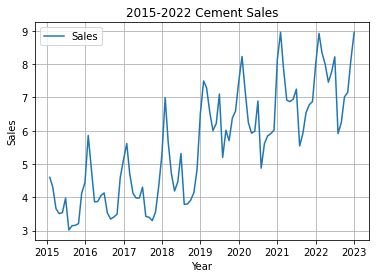

In [76]:
plt.plot(data['Date'], data['Sales_Quantity_Milliontonnes'], label = 'Sales')
plt.title('2015-2022 Cement Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()
plt.legend()

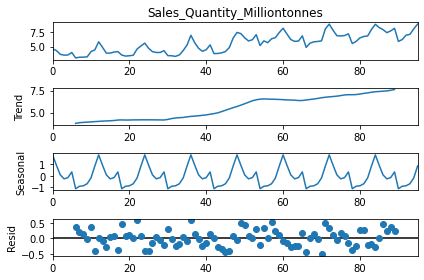

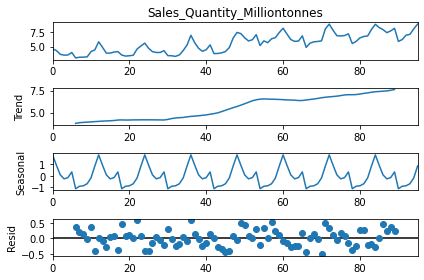

In [77]:
decomposition = seasonal_decompose(data['Sales_Quantity_Milliontonnes'], model='addititive', period= 12)
decomposition.plot()

Adfuller test to check stationarity

In [78]:
for i in range(len(data.columns)):
    result = adfuller(data[data.columns[i]])
    
    if result[1] > 0.05 :
        print('{} - series is not stationary'.format(data.columns[i]))
    else:
        print('{} - series is stationary'.format(data.columns[i]))

Date - series is not stationary
GDP_Construction_Rs_Crs - series is not stationary
GDP_Realestate_Rs_Crs - series is not stationary
Oveall_GDP_Growth% - series is not stationary
Water_Source - series is stationary
Limestone - series is stationary
Coal_Milliontonne - series is not stationary
Home_Interest_Rate - series is not stationary
Trasportation_Cost - series is not stationary
Order_Quantity_Milliontonnes - series is not stationary
Sales_Quantity_Milliontonnes - series is not stationary
Unit_Price - series is stationary


EDA report using AUTO EDA

In [79]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, tsmode=True, sortby="Date")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Splitting the data

In [80]:
train = data.iloc[:-12]
test = data.iloc[-12:]
train, test

(         Date  GDP_Construction_Rs_Crs  GDP_Realestate_Rs_Crs  \
 0  2015-01-31                 214180.0               481401.0   
 1  2015-02-28                 214180.0               481401.0   
 2  2015-03-31                 214180.0               481401.0   
 3  2015-04-30                 218253.0               594978.0   
 4  2015-05-31                 218253.0               594978.0   
 ..        ...                      ...                    ...   
 79 2021-08-31                 264074.0               708165.0   
 80 2021-09-30                 264074.0               708165.0   
 81 2021-10-31                 316351.0               711375.0   
 82 2021-11-30                 316351.0               711375.0   
 83 2021-12-31                 316351.0               711375.0   
 
     Oveall_GDP_Growth%  Water_Source  Limestone  Coal_Milliontonne  \
 0                 7.50        178.06     169.76             0.0944   
 1                 8.00        169.09     238.44             0.0

Rename date and sales columns

Prophet expect date column and output column names to be ds and y

In [81]:
train = train.rename(columns={'Sales_Quantity_Milliontonnes': 'y', 'Date':'ds'})
train

ds  GDP_Construction_Rs_Crs  GDP_Realestate_Rs_Crs  \
0  2015-01-31                 214180.0               481401.0   
1  2015-02-28                 214180.0               481401.0   
2  2015-03-31                 214180.0               481401.0   
3  2015-04-30                 218253.0               594978.0   
4  2015-05-31                 218253.0               594978.0   
..        ...                      ...                    ...   
79 2021-08-31                 264074.0               708165.0   
80 2021-09-30                 264074.0               708165.0   
81 2021-10-31                 316351.0               711375.0   
82 2021-11-30                 316351.0               711375.0   
83 2021-12-31                 316351.0               711375.0   

    Oveall_GDP_Growth%  Water_Source  Limestone  Coal_Milliontonne  \
0                 7.50        178.06     169.76             0.0944   
1                 8.00        169.09     238.44             0.0745   
2                 8.50        170.73     176.68             0.0721   
3                 8.60        266.73     234.24             0.0733   
4                 8.50        243.53     220.01             0.0734   
..                 ...           ...        ...                ...   
79                0.85        207.97     212.22             0.0675   
80                0.85        164.79     119.81             0.0825   
81                1.00        119.20     172.81             0.0973   
82                1.40        166.38     106.19             0.1164   
83                2.40        120.73     206.77             0.1345   

    Home_Interest_Rate  Trasportation_Cost  Order_Quantity_Milliontonnes  \
0                10.15          322.070000                         4.798   
1                10.00          316.918451                         4.318   
2                 9.10          286.484332                         3.719   
3                10.20          286.292799                         3.583   
4                 9.90          300.299462                         3.581   
..                 ...                 ...                           ...   
79                6.65          457.880150                         5.995   
80                6.65          498.395728                         6.622   
81                6.65          542.249446                         6.881   
82                6.65          522.904224                         6.912   
83                6.65          609.188484                         8.311   

        y  Unit_Price  
0   4.598      350.23  
1   4.308      350.31  
2   3.659      355.89  
3   3.510      354.63  
4   3.541      353.36  
..    ...         ...  
79  5.915      387.05  
80  6.542      380.92  
81  6.781      399.83  
82  6.872      380.46  
83  8.011      380.22  

[84 rows x 12 columns]

In [82]:
test = test.rename(columns={'Sales_Quantity_Milliontonnes': 'y', 'Date':'ds'})
test

ds  GDP_Construction_Rs_Crs  GDP_Realestate_Rs_Crs  \
84 2022-01-31                 262918.0               880313.0   
85 2022-02-28                 262918.0               880313.0   
86 2022-03-31                 262918.0               880313.0   
87 2022-04-30                 259098.0               924137.0   
88 2022-05-31                 259098.0               924137.0   
89 2022-06-30                 259098.0               924137.0   
90 2022-07-31                 273487.0               816470.0   
91 2022-08-31                 273487.0               816470.0   
92 2022-09-30                 273487.0               816470.0   
93 2022-10-31                 316351.0               843219.0   
94 2022-11-30                 316351.0               843219.0   
95 2022-12-31                 316351.0               843219.0   

    Oveall_GDP_Growth%  Water_Source  Limestone  Coal_Milliontonne  \
84               12.45        274.49     192.36            0.12460   
85               12.45        140.32     199.06            0.11640   
86               12.45        277.70     124.03            0.10640   
87                9.40        260.72     147.71            0.09730   
88                7.40        211.97     115.78            0.09147   
89                8.40        289.58     219.23            0.08650   
90                7.60        137.05     133.01            0.06420   
91                8.50        121.56     141.74            0.07340   
92                8.30        247.73     168.44            0.08930   
93                7.60        262.48     146.56            0.12770   
94                8.90        150.98     159.77            0.12450   
95                7.80        151.63     195.44            0.13490   

    Home_Interest_Rate  Trasportation_Cost  Order_Quantity_Milliontonnes  \
84                6.65          672.643400                         8.921   
85                6.65          630.514820                         8.445   
86                6.65          570.464370                         8.038   
87                6.75          580.300480                         7.528   
88                6.85          557.140836                         7.831   
89                7.05          653.648528                         8.392   
90                7.15          431.966192                         6.091   
91                7.35          494.928740                         6.317   
92                7.35          520.414790                         7.126   
93                7.60          517.847712                         7.223   
94                7.75          581.142216                         8.229   
95                8.00          690.657836                         8.701   

        y  Unit_Price  
84  8.921      377.00  
85  8.345      377.78  
86  7.985      357.21  
87  7.456      389.15  
88  7.762      358.89  
89  8.216      397.79  
90  5.912      365.33  
91  6.245      396.26  
92  7.015      370.93  
93  7.152      362.03  
94  8.124      357.67  
95  8.954      385.67

Initiating model

Univariate model

In [83]:
model_uv = Prophet()

In [84]:
model_uv.fit(train)

12:09:53 - cmdstanpy - INFO - Chain [1] start processing
12:09:53 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
train_uv_forecasts = model_uv.predict(train)
train_uv_forecasts

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2015-01-31  3.455170    4.813821    5.723330     3.455170     3.455170   
1  2015-02-28  3.483925    4.074933    4.973633     3.483925     3.483925   
2  2015-03-31  3.515761    3.276776    4.161522     3.515761     3.515761   
3  2015-04-30  3.546570    2.826773    3.734359     3.546570     3.546570   
4  2015-05-31  3.578406    2.888326    3.819326     3.578406     3.578406   
..        ...       ...         ...         ...          ...          ...   
79 2021-08-31  7.087137    5.789399    6.738132     7.087137     7.087137   
80 2021-09-30  7.129611    5.888735    6.810389     7.129611     7.129611   
81 2021-10-31  7.173501    6.086364    6.991035     7.173501     7.173501   
82 2021-11-30  7.215975    6.567501    7.549252     7.215975     7.215975   
83 2021-12-31  7.259866    7.765370    8.718631     7.259866     7.259866   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         1.817352              1.817352              1.817352  1.817352   
1         1.019281              1.019281              1.019281  1.019281   
2         0.222069              0.222069              0.222069  0.222069   
3        -0.252034             -0.252034             -0.252034 -0.252034   
4        -0.194288             -0.194288             -0.194288 -0.194288   
..             ...                   ...                   ...       ...   
79       -0.845794             -0.845794             -0.845794 -0.845794   
80       -0.758520             -0.758520             -0.758520 -0.758520   
81       -0.625758             -0.625758             -0.625758 -0.625758   
82       -0.129523             -0.129523             -0.129523 -0.129523   
83        0.985959              0.985959              0.985959  0.985959   

    yearly_lower  yearly_upper  multiplicative_terms  \
0       1.817352      1.817352                   0.0   
1       1.019281      1.019281                   0.0   
2       0.222069      0.222069                   0.0   
3      -0.252034     -0.252034                   0.0   
4      -0.194288     -0.194288                   0.0   
..           ...           ...                   ...   
79     -0.845794     -0.845794                   0.0   
80     -0.758520     -0.758520                   0.0   
81     -0.625758     -0.625758                   0.0   
82     -0.129523     -0.129523                   0.0   
83      0.985959      0.985959                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                          0.0                         0.0  5.272521  
1                          0.0                         0.0  4.503206  
2                          0.0                         0.0  3.737829  
3                          0.0                         0.0  3.294535  
4                          0.0                         0.0  3.384118  
..                         ...                         ...       ...  
79                         0.0                         0.0  6.241342  
80                         0.0                         0.0  6.371091  
81                         0.0                         0.0  6.547743  
82                         0.0                         0.0  7.086453  
83                         0.0                         0.0  8.245824  

[84 rows x 16 columns]

In [86]:
mse = mean_squared_error(train_uv_forecasts['yhat'], train['y'])
rmse = math.sqrt(mse)
mae = mean_absolute_error(train_uv_forecasts['yhat'], train['y'])
mape = mean_absolute_percentage_error(train_uv_forecasts['yhat'], train['y'])
mse, rmse, mae, mape

(0.12915351459909002,
 0.3593793463724509,
 0.29444602311877677,
 0.05970231723785524)

In [87]:
test_uv_forecasts = model_uv.predict(test)
test_uv_forecasts

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-31  7.303756    8.716179    9.627940     7.303367     7.304293   
1  2022-02-28  7.343398    7.884774    8.770273     7.341502     7.345922   
2  2022-03-31  7.387289    7.065511    7.972529     7.382847     7.392781   
3  2022-04-30  7.429763    6.761269    7.660054     7.422023     7.439470   
4  2022-05-31  7.473653    6.859496    7.780646     7.462552     7.488321   
5  2022-06-30  7.516127    7.464530    8.358664     7.500560     7.536058   
6  2022-07-31  7.560018    6.042262    6.945869     7.539376     7.585571   
7  2022-08-31  7.603908    6.344764    7.240069     7.578801     7.636058   
8  2022-09-30  7.646382    6.402074    7.300462     7.615293     7.685260   
9  2022-10-31  7.690272    6.639723    7.579969     7.652526     7.736075   
10 2022-11-30  7.732747    7.231993    8.150922     7.688032     7.787525   
11 2022-12-31  7.776637    8.199893    9.126525     7.725219     7.840018   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         1.869225              1.869225              1.869225  1.869225   
1         0.987413              0.987413              0.987413  0.987413   
2         0.135177              0.135177              0.135177  0.135177   
3        -0.221049             -0.221049             -0.221049 -0.221049   
4        -0.154962             -0.154962             -0.154962 -0.154962   
5         0.381419              0.381419              0.381419  0.381419   
6        -1.065838             -1.065838             -1.065838 -1.065838   
7        -0.817721             -0.817721             -0.817721 -0.817721   
8        -0.823046             -0.823046             -0.823046 -0.823046   
9        -0.580139             -0.580139             -0.580139 -0.580139   
10       -0.051320             -0.051320             -0.051320 -0.051320   
11        0.892493              0.892493              0.892493  0.892493   

    yearly_lower  yearly_upper  multiplicative_terms  \
0       1.869225      1.869225                   0.0   
1       0.987413      0.987413                   0.0   
2       0.135177      0.135177                   0.0   
3      -0.221049     -0.221049                   0.0   
4      -0.154962     -0.154962                   0.0   
5       0.381419      0.381419                   0.0   
6      -1.065838     -1.065838                   0.0   
7      -0.817721     -0.817721                   0.0   
8      -0.823046     -0.823046                   0.0   
9      -0.580139     -0.580139                   0.0   
10     -0.051320     -0.051320                   0.0   
11      0.892493      0.892493                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                          0.0                         0.0  9.172980  
1                          0.0                         0.0  8.330812  
2                          0.0                         0.0  7.522465  
3                          0.0                         0.0  7.208714  
4                          0.0                         0.0  7.318691  
5                          0.0                         0.0  7.897547  
6                          0.0                         0.0  6.494179  
7                          0.0                         0.0  6.786187  
8                          0.0                         0.0  6.823336  
9                          0.0                         0.0  7.110133  
10                         0.0                         0.0  7.681427  
11                         0.0                         0.0  8.669130

In [88]:
mse = mean_squared_error(test_uv_forecasts['yhat'], test['y'])
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_uv_forecasts['yhat'], test['y'])
mape = mean_absolute_percentage_error(test_uv_forecasts['yhat'], test['y'])
mse, rmse, mae, mape

(0.1320038152232663,
 0.36332329298197535,
 0.3185076986703956,
 0.04330899028859805)

Multivariate model

In [89]:
model = Prophet( growth='linear', yearly_seasonality= True, weekly_seasonality= False,
                daily_seasonality= False, holidays=None, seasonality_mode='additive',)

Adding regressors to the model built

In [90]:
model.add_regressor('GDP_Construction_Rs_Crs')
model.add_regressor('GDP_Realestate_Rs_Crs')
model.add_regressor('Oveall_GDP_Growth%')
model.add_regressor('Water_Source')
model.add_regressor('Limestone')
model.add_regressor('Coal_Milliontonne')
model.add_regressor('Home_Interest_Rate')
model.add_regressor('Trasportation_Cost')
model.add_regressor('Order_Quantity_Milliontonnes')
model.add_regressor('Unit_Price')
model.fit(train)

12:10:14 - cmdstanpy - INFO - Chain [1] start processing
12:10:15 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
train_mv_forecasts = model.predict(train)
train_mv_forecasts

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2015-01-31  4.806024    4.316070    4.612441     4.806024     4.806024   
1  2015-02-28  4.816159    4.119894    4.400846     4.816159     4.816159   
2  2015-03-31  4.827381    3.490071    3.785815     4.827381     4.827381   
3  2015-04-30  4.838240    3.319893    3.606096     4.838240     4.838240   
4  2015-05-31  4.849462    3.413420    3.696830     4.849462     4.849462   
..        ...       ...         ...         ...          ...          ...   
79 2021-08-31  5.531304    5.779366    6.066029     5.531304     5.531304   
80 2021-09-30  5.533943    6.406198    6.705938     5.533943     5.533943   
81 2021-10-31  5.536670    6.602547    6.894894     5.536670     5.536670   
82 2021-11-30  5.539309    6.762776    7.033342     5.539309     5.539309   
83 2021-12-31  5.542035    7.882397    8.163661     5.542035     5.542035   

    Coal_Milliontonne  Coal_Milliontonne_lower  Coal_Milliontonne_upper  \
0            0.002527                 0.002527                 0.002527   
1           -0.004714                -0.004714                -0.004714   
2           -0.005587                -0.005587                -0.005587   
3           -0.005150                -0.005150                -0.005150   
4           -0.005114                -0.005114                -0.005114   
..                ...                      ...                      ...   
79          -0.007261                -0.007261                -0.007261   
80          -0.001803                -0.001803                -0.001803   
81           0.003583                 0.003583                 0.003583   
82           0.010532                 0.010532                 0.010532   
83           0.017119                 0.017119                 0.017119   

    GDP_Construction_Rs_Crs  ...  extra_regressors_additive  \
0                  0.016821  ...                  -0.363874   
1                  0.016821  ...                  -0.766893   
2                  0.016821  ...                  -1.300909   
3                  0.014139  ...                  -1.362638   
4                  0.014139  ...                  -1.315113   
..                      ...  ...                        ...   
79                -0.016043  ...                   0.423460   
80                -0.016043  ...                   1.077073   
81                -0.050477  ...                   1.207383   
82                -0.050477  ...                   1.337254   
83                -0.050477  ...                   2.441062   

    extra_regressors_additive_lower  extra_regressors_additive_upper  \
0                         -0.363874                        -0.363874   
1                         -0.766893                        -0.766893   
2                         -1.300909                        -1.300909   
3                         -1.362638                        -1.362638   
4                         -1.315113                        -1.315113   
..                              ...                              ...   
79                         0.423460                         0.423460   
80                         1.077073                         1.077073   
81                         1.207383                         1.207383   
82                         1.337254                         1.337254   
83                         2.441062                         2.441062   

      yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   0.020485      0.020485      0.020485                   0.0   
1   0.206632      0.206632      0.206632                   0.0   
2   0.111520      0.111520      0.111520                   0.0   
3  -0.005838     -0.005838     -0.005838                   0.0   
4   0.023420      0.023420      0.023420                   0.0   
..       ...           ...           ...                   ...   
79 -0.029240     -0.029240     -0.029240                   0.0   
80 -0.055270     -0.055270     -0.0

In [91]:
plot_plotly(model, train_mv_forecasts, xlabel = 'Date', ylabel = 'Sales_Milliontonnes')

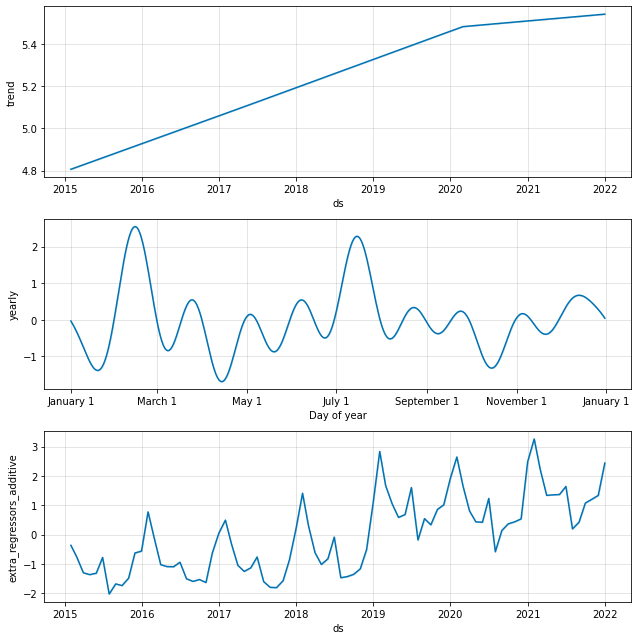

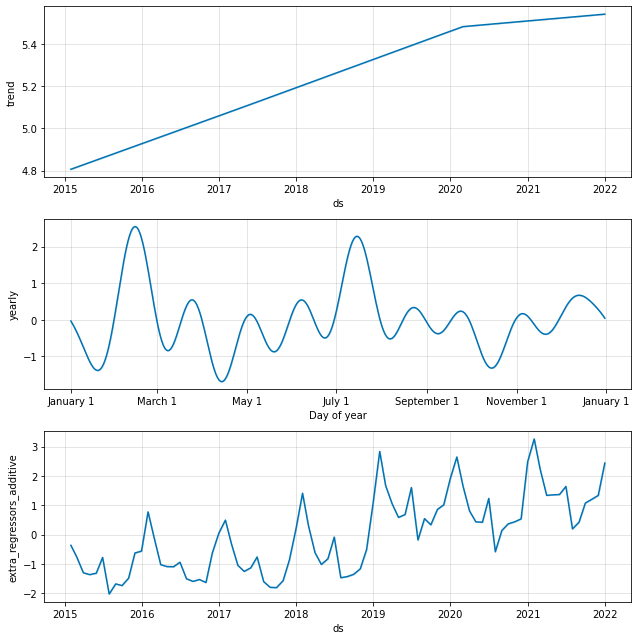

In [92]:
model.plot_components(train_mv_forecasts)

In [93]:
mse = mean_squared_error(train_mv_forecasts['yhat'], train['y'])
rmse = math.sqrt(mse)
mae = mean_absolute_error(train_mv_forecasts['yhat'], train['y'])
mape = mean_absolute_percentage_error(train_mv_forecasts['yhat'], train['y'])
mse, rmse, mae, mape

(0.01247254321691092,
 0.11168054090534717,
 0.06975526620924602,
 0.013643187081521886)

Compare Univariate vs Multivariate forecasts

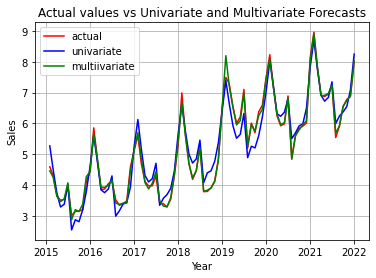

In [94]:
plt.plot(train['ds'], train['y'], color = 'red', label = 'actual')
plt.plot(train['ds'], train_uv_forecasts['yhat'], color = 'blue', label = 'univariate')
plt.plot(train['ds'], train_mv_forecasts['yhat'], color = 'green', label = 'multiivariate')
plt.title('Actual values vs Univariate and Multivariate Forecasts')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()
plt.legend()

In [95]:
test_mv_forecasts = model.predict(test)
test_mv_forecasts

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-31  5.544762    8.493332    8.780526     5.544647     5.544815   
1  2022-02-28  5.547226    8.055496    8.344176     5.546846     5.547487   
2  2022-03-31  5.549952    7.722017    8.012105     5.549171     5.550509   
3  2022-04-30  5.552591    7.192514    7.476356     5.551278     5.553623   
4  2022-05-31  5.555318    7.561672    7.842662     5.553506     5.556856   
5  2022-06-30  5.557957    7.968290    8.249449     5.555567     5.560117   
6  2022-07-31  5.560684    5.895213    6.188680     5.557585     5.563452   
7  2022-08-31  5.563411    6.077244    6.364669     5.559547     5.566857   
8  2022-09-30  5.566050    6.840469    7.127851     5.561491     5.570259   
9  2022-10-31  5.568777    6.985948    7.263406     5.563426     5.573860   
10 2022-11-30  5.571416    7.854017    8.132585     5.565200     5.577378   
11 2022-12-31  5.574143    8.458356    8.747963     5.567170     5.581225   

    Coal_Milliontonne  Coal_Milliontonne_lower  Coal_Milliontonne_upper  \
0            0.013516                 0.013516                 0.013516   
1            0.010532                 0.010532                 0.010532   
2            0.006894                 0.006894                 0.006894   
3            0.003583                 0.003583                 0.003583   
4            0.001461                 0.001461                 0.001461   
5           -0.000347                -0.000347                -0.000347   
6           -0.008462                -0.008462                -0.008462   
7           -0.005114                -0.005114                -0.005114   
8            0.000672                 0.000672                 0.000672   
9            0.014644                 0.014644                 0.014644   
10           0.013480                 0.013480                 0.013480   
11           0.017264                 0.017264                 0.017264   

    GDP_Construction_Rs_Crs  ...  extra_regressors_additive  \
0                 -0.015282  ...                   3.013099   
1                 -0.015282  ...                   2.504602   
2                 -0.015282  ...                   2.238205   
3                 -0.012765  ...                   1.776174   
4                 -0.012765  ...                   2.094830   
5                 -0.012765  ...                   2.520335   
6                 -0.022243  ...                   0.478512   
7                 -0.022243  ...                   0.673170   
8                 -0.022243  ...                   1.444833   
9                 -0.050477  ...                   1.573294   
10                -0.050477  ...                   2.420845   
11                -0.050477  ...                   2.972513   

    extra_regressors_additive_lower  extra_regressors_additive_upper  \
0                          3.013099                         3.013099   
1                          2.504602                         2.504602   
2                          2.238205                         2.238205   
3                          1.776174                         1.776174   
4                          2.094830                         2.094830   
5                          2.520335                         2.520335   
6                          0.478512                         0.478512   
7                          0.673170                         0.673170   
8                          1.444833                         1.444833   
9                          1.573294                         1.573294   
10                         2.420845                         2.420845   
11                         2.972513                         2.972513   

      yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   0.079289      0.079289      0.079289                   0.0   
1   0.151841      0.151841      0.151841                   0.0   
2   0.076591      0.076591      0.076591                   0.0   
3   0.013521

In [96]:
plot_plotly(model, test_mv_forecasts,  xlabel = 'Date', ylabel = 'Sales_Milliontonnes')

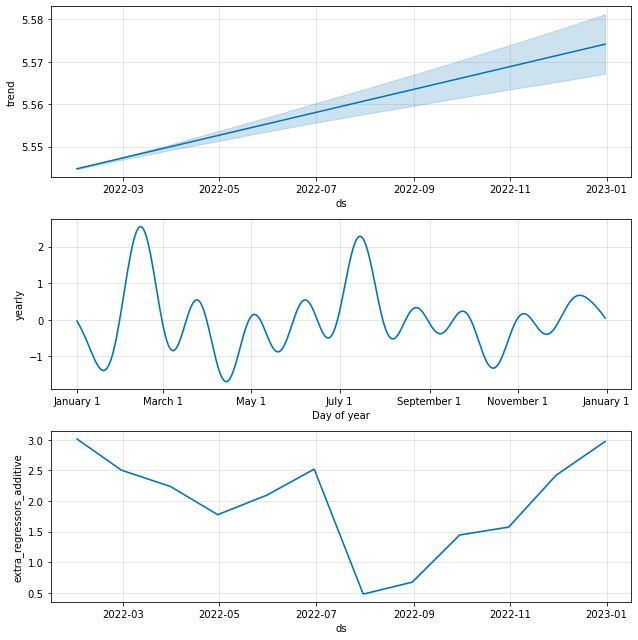

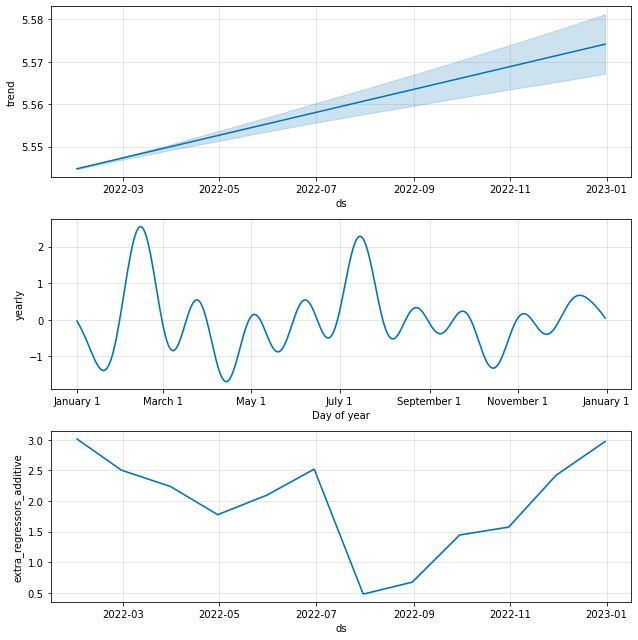

In [97]:
model.plot_components(test_mv_forecasts)

In [98]:
test_forecasts = pd.DataFrame(test_mv_forecasts[['yhat', 'yhat_upper', 'yhat_lower']])
test_forecasts

yhat  yhat_upper  yhat_lower
0   8.637150    8.780526    8.493332
1   8.203669    8.344176    8.055496
2   7.864749    8.012105    7.722017
3   7.342287    7.476356    7.192514
4   7.702272    7.842662    7.561672
5   8.110921    8.249449    7.968290
6   6.036902    6.188680    5.895213
7   6.224338    6.364669    6.077244
8   6.977664    7.127851    6.840469
9   7.120203    7.263406    6.985948
10  7.997748    8.132585    7.854017
11  8.603766    8.747963    8.458356

In [99]:
mse = mean_squared_error( test['y'], test_mv_forecasts['yhat'])
rmse = math.sqrt(mse)
mae = mean_absolute_error( test['y'], test_mv_forecasts['yhat'])
mape = mean_absolute_percentage_error( test['y'], test_mv_forecasts['yhat'])
mse, rmse, mae, mape

(0.024965120469438176,
 0.15800354574957542,
 0.12626136446106898,
 0.015700726883860483)

In [104]:
data1 = pd.read_excel(r"C:\Users\psaik\OneDrive\Desktop\final data with future.xlsx")
data1

ds  GDP_Construction_Rs_Crs  GDP_Realestate_Rs_Crs  \
0   2015-01-31                   214180                 481401   
1   2015-02-28                   214180                 481401   
2   2015-03-31                   214180                 481401   
3   2015-04-30                   218253                 594978   
4   2015-05-31                   218253                 594978   
..         ...                      ...                    ...   
103 2023-08-31                   324557                  85093   
104 2023-09-30                   324557                  85093   
105 2023-10-31                   369528                  87321   
106 2023-11-30                   369528                  87321   
107 2023-12-31                   369528                  87321   

     Oveall_GDP_Growth%  Water_Source  Limestone  Coal_Milliontonne  \
0                   7.5        178.06     169.76             0.0944   
1                   8.0        169.09     238.44             0.0745   
2                   8.5        170.73     176.68             0.0721   
3                   8.6        266.73     234.24             0.0733   
4                   8.5        243.53     220.01             0.0734   
..                  ...           ...        ...                ...   
103                 8.9        131.56     148.74             0.0801   
104                 8.9        257.73     171.44             0.0853   
105                 8.8        282.48     152.56             0.1357   
106                 8.9        160.98     159.77             0.1239   
107                 8.8        151.63     187.44             0.1319   

     Home_Interest_Rate  Trasportation_Cost  Order_Quantity_Milliontonnes  \
0                 10.15          322.070000                         4.798   
1                 10.00          316.918451                         4.318   
2                  9.10          286.484332                         3.719   
3                 10.20          286.292799                         3.583   
4                  9.90          300.299462                         3.581   
..                  ...                 ...                           ...   
103                7.25          514.928740                         6.477   
104                7.35          529.414790                         7.366   
105                7.67          537.847712                         7.413   
106                7.75          588.142216                         8.439   
107                7.95          699.657836                         8.781   

     Sales_Quantity_Milliontonnes  Unit_Price  
0                           4.598      350.23  
1                           4.308      350.31  
2                           3.659      355.89  
3                           3.510      354.63  
4                           3.541      353.36  
..                            ...         ...  
103                           NaN      401.26  
104                           NaN      378.93  
105                           NaN      369.03  
106                           NaN      377.67  
107                           NaN      391.67  

[108 rows x 12 columns]

In [105]:
forecast = model.predict(data1)

In [106]:
plot_plotly(model, forecast,  xlabel = 'Date', ylabel = 'Sales_Milliontonnes')

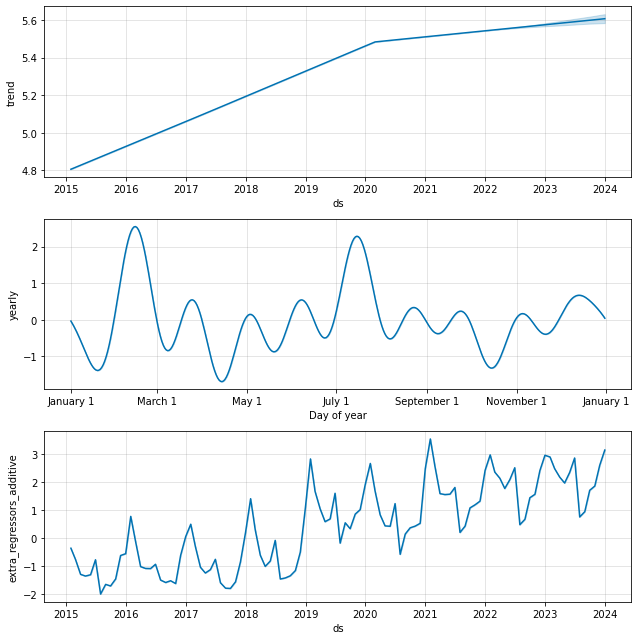

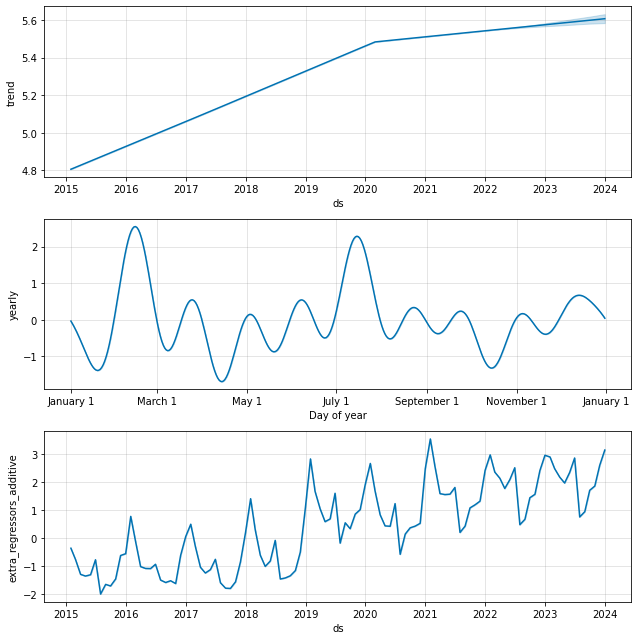

In [107]:
model.plot_components(forecast)

In [108]:
Forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

In [109]:
Forecast_df.rename(columns = {'ds' : 'Date', 'yhat' : 'Sales_Forecast', 'yhat_upper' : 'Sales_Max_Forecast', 'yhat_lower' : 'Sales_Min_Forecast'}, inplace = True)

In [110]:
Forecast_df

Date  Sales_Forecast  Sales_Min_Forecast  Sales_Max_Forecast
96  2023-01-31        8.503399            8.364305            8.646050
97  2023-02-28        8.274304            8.139471            8.414174
98  2023-03-31        7.877173            7.725071            8.013408
99  2023-04-30        7.551964            7.410720            7.693654
100 2023-05-31        7.965610            7.829710            8.104803
101 2023-06-30        8.454369            8.320007            8.594590
102 2023-07-31        6.383591            6.240002            6.523531
103 2023-08-31        6.546820            6.394331            6.681421
104 2023-09-30        7.298539            7.148354            7.444851
105 2023-10-31        7.424291            7.277830            7.552105
106 2023-11-30        8.197541            8.067521            8.354881
107 2023-12-31        8.833077            8.690902            8.984197